# **Health Data Analysis Project**
## **Topic: To Analyse The Relationship Between Sleep Pattern And Health**





### 1. **Introduction**
Sleep is a periodic state of muscular relaxation, reduced metabolic rate, and suspended consciousness in which a person is largely unresponsive to events in the environment.

All human beings need sleep. We spend a third of our lives asleep, and it’s as important as food, water or air to our survival. While scientists are still working to understand the exact nature of sleep and why it’s so important to our well-being, decades of research have made it clear that adequate sleep is vital to our physical and mental health.

Among many other things, sleep plays a crucial role in memory consolidation and other brain functions ie Cognitive function, Mood stability, Stress reduction. Sleep also supports the immune system and healing after injury or disease, and protecting against heart disease, diabetes and weight control among others.

**Objective:**  

This project aims to examine the relationship between the quality of sleep and the general physical health and to assess the role of consistent sleep schedules in preventing chronic diseases such as diabetes, obesity, and cardiovascular conditions.


**Hypothesis:**

-There is a statistically significant relationship between sleep quality and stress level.

-There is a statistically significant relationship between sleep quality and blood pressure.

-There is a statistically significant relationship between sleep quality and stress level and heart rate.

-There is a statistically significant relationship between sleep quality and physical activity and saily steps.

-There is a statistically significant relationship between sleep quality and BMI.

## 2. **Data** **Collection**
**Data Source:**  
- Dataset name: Sleep_health_and_lifestyle_dataset.csv  
- Source: Kaggle
- URL: (https://www.kaggle.com/datasets/orvile/health-and-sleep-relation-2024)



In [ ]:
#Loading the data set
import pandas as pd

sleep_df = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv', index_col = 'Person ID')
sleep_df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
#Understanding the dataset
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


**Dataset Understanding**

-The above data set was collected by oxford university in 2024 with the aim of Health Promotion and Health Maintenance.

-It explores the relationship between sleep patterns and overall health and It includes detailed information on individual sleep habits, health metrics, and lifestyle factors, enabling analysis of how sleep quality and duration impact physical and mental well-being.

-It is made up of 374 records and 13 columns in total.
-It also has mixed data types (int, float and object)
-It also has (missing) non-null values in the **Sleep Disorder** column, which to my understanding from the original dataset which had **None** meaning **No sleeping disoder** , but pandas understands its as **Null/missing values**.



## 3. **Data** **Cleaning**
**Tasks Performed:**  
- Removed duplicates  
- Handled missing values (e.g., filled with median)  
- Converted data types  
- Renamed confusing column names  
- Dropped unnecessary columns

**Before & After Snapshot:**  
Use `.head()`, `.info()` or `.describe()` to show changes.

In [ ]:
# checking for duplicates
sleep_df.duplicated().sum() #no duplicates
sleep_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
# checking for null values and handling them
sleep_df.isnull().sum()

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0
Heart Rate,0


the sleep disorder columns shows 219 null values which are not true null values

In [ ]:
#handling missing values in the sleep column  by replacing them with No
sleep_df['Sleep Disorder'] = sleep_df['Sleep Disorder'].fillna('No') # 'No' meaning they dont have sleaping disorders
sleep_df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
#checking if there are any more missing values
sleep_df.isnull().sum() # None

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0
Heart Rate,0


In [ ]:
#creating a 2 new column 'Systolic Blood Pressure' and 'Diastolic Blood Pressure' from the 'Blood Pressure' column
sleep_df[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = sleep_df['Blood Pressure'].str.split('/', expand=True)
sleep_df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
Person ID,,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No,126,83
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No,125,80
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No,125,80
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [ ]:
# Renaming the 'Sleep Duration' and 'Quality of Sleep' columns to 'Sleep Duration (hrs)' and ''Quality of Sleep Rating'
sleep_df.rename(columns={'Sleep Duration': 'Sleep Duration (hrs)', 'Quality of Sleep': 'Quality of Sleep Rating'}, inplace=True)
sleep_df.head()

,Gender,Age,Occupation,Sleep Duration (hrs),Quality of Sleep Rating,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
Person ID,,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No,126,83
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No,125,80
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No,125,80
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [ ]:
#Changning the record Normal Weight in the BMI Category Column with Slightly Obese
sleep_df['BMI Category'] = sleep_df['BMI Category'].replace('Normal Weight', 'Slightly Obese')
sleep_df.head(5)

,Gender,Age,Occupation,Sleep Duration (hrs),Quality of Sleep Rating,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
Person ID,,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No,126,83
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No,125,80
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No,125,80
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


## 4. **Exploratory Data Analysis (EDA)**
**Descriptive Statistics:**  
- Summary statistics (mean, median, mode)  
- Distribution of age, BMI, blood pressure, etc.

**Visualizations:**  
- Histogram of Age  
- Boxplot of BMI by Gender  
- Pie chart of Disease Diagnoses  
- Correlation Heatmap  
- Pair Plot

**Key Observations:**  
- Example: Majority of patients with high BP are aged over 45  
- Strong correlation between cholesterol and heart disease


In [ ]:
sleep_df.describe()

,Age,Sleep Duration (hrs),Quality of Sleep Rating,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Summary statistics of numerical columns(age, sleep duration, sleep quality, stress level, physical activity)

In [ ]:
# importing necesary libraries
import numpy as np
from scipy import stats

In [ ]:
# summary statistics for age
age_mean = np.mean(sleep_df['Age'])
age_median = np.median(sleep_df['Age'])
age_mode = stats.mode(sleep_df['Age'])
age_Variace = np.var(sleep_df['Age'])
age_std = np.std(sleep_df['Age'])
age_min = np.min(sleep_df['Age'])
age_max = np.max(sleep_df['Age'])

print("Mean Age:", age_mean)
print("Median Age:", age_median)
print("Mode Age:", age_mode.mode)
print("Variance Age:", age_Variace)
print("Standard Deviation Age:", age_std)
print("Minimum Age:", age_min)
print("Maximum Age:", age_max)


Mean Age: 42.18449197860963
Median Age: 43.0
Mode Age: 43
Variance Age: 75.02211244244896
Standard Deviation Age: 8.661530606217873
Minimum Age: 27
Maximum Age: 59


In [ ]:
#summary statistics for Sleep Duration (hrs)
Sleep_Duration_mean = np.mean(sleep_df['Sleep Duration (hrs)'])
Sleep_Duration_median = np.median(sleep_df['Sleep Duration (hrs)'])
Sleep_Duration_mode = stats.mode(sleep_df['Sleep Duration (hrs)'])
Sleep_Duration_Variace = np.var(sleep_df['Sleep Duration (hrs)'])
Sleep_Duration_std = np.std(sleep_df['Sleep Duration (hrs)'])
Sleep_Duration_min = np.min(sleep_df['Sleep Duration (hrs)'])
Sleep_Duration_max = np.max(sleep_df['Sleep Duration (hrs)'])

print("Mean Sleep Duration:", Sleep_Duration_mean)
print("Median Sleep Duration:", Sleep_Duration_median)
print("Mode Sleep Duration:", Sleep_Duration_mode.mode)
print("Variance Sleep Duration:", Sleep_Duration_Variace)
print("Standard Deviation Sleep Duration:", Sleep_Duration_std)
print("Minimum Sleep Duration:", Sleep_Duration_min)
print("Maximum Sleep Duration:", Sleep_Duration_max)

Mean Sleep Duration: 7.132085561497325
Median Sleep Duration: 7.2
Mode Sleep Duration: 7.2
Variance Sleep Duration: 0.6313769338557007
Standard Deviation Sleep Duration: 0.7945923066929989
Minimum Sleep Duration: 5.8
Maximum Sleep Duration: 8.5


In [ ]:
#summary statistics for sleep quality
sleep_quality_mean = np.mean(sleep_df['Quality of Sleep Rating'])
sleep_quality_median = np.median(sleep_df['Quality of Sleep Rating'])
sleep_quality_mode = stats.mode(sleep_df['Quality of Sleep Rating'])
sleep_quality_Variace = np.var(sleep_df['Quality of Sleep Rating'])
sleep_quality_std = np.std(sleep_df['Quality of Sleep Rating'])
sleep_quality_min = np.min(sleep_df['Quality of Sleep Rating'])
sleep_quality_max = np.max(sleep_df['Quality of Sleep Rating'])

print("Mean Sleep Quality:", sleep_quality_mean)
print("Median Sleep Quality:", sleep_quality_median)
print("Mode Sleep Quality:", sleep_quality_mode.mode)
print("Variance Sleep Quality:", sleep_quality_Variace)
print("Standard Deviation Sleep Quality:", sleep_quality_std)
print("Minimum Sleep Quality:", sleep_quality_min)
print("Maximum Sleep Quality:", sleep_quality_max)

Mean Sleep Quality: 7.31283422459893
Median Sleep Quality: 7.0
Mode Sleep Quality: 8
Variance Sleep Quality: 1.428872715834021
Standard Deviation Sleep Quality: 1.1953546401942903
Minimum Sleep Quality: 4
Maximum Sleep Quality: 9


In [ ]:
#summary statistics for stress level
stress_mean = np.mean(sleep_df['Stress Level'])
stress_median = np.median(sleep_df['Stress Level'])
stress_mode = stats.mode(sleep_df['Stress Level'])
stress_Variace = np.var(sleep_df['Stress Level'])
stress_std = np.std(sleep_df['Stress Level'])
stress_min = np.min(sleep_df['Stress Level'])
stress_max = np.max(sleep_df['Stress Level'])

print("Mean Stress Level:", stress_mean)
print("Median Stress Level:", stress_median)
print("Mode Stress Level:", stress_mode.mode)
print("Variance Stress Level:", stress_Variace)
print("Standard Deviation Stress Level:", stress_std)
print("Minimum Stress Level:", stress_min)
print("Maximum Stress Level:", stress_max)

Mean Stress Level: 5.385026737967914
Median Stress Level: 5.0
Mode Stress Level: 3
Variance Stress Level: 3.140524464525714
Standard Deviation Stress Level: 1.7721524947153149
Minimum Stress Level: 3
Maximum Stress Level: 8


In [ ]:
#summary statistics on physical activity
physical_activity_mean = np.mean(sleep_df['Physical Activity Level'])
physical_activity_median = np.median(sleep_df['Physical Activity Level'])
physical_activity_mode = stats.mode(sleep_df['Physical Activity Level'])
physical_activity_Variace = np.var(sleep_df['Physical Activity Level'])
physical_activity_std = np.std(sleep_df['Physical Activity Level'])
physical_activity_min = np.min(sleep_df['Physical Activity Level'])
physical_activity_max = np.max(sleep_df['Physical Activity Level'])

print("Mean Physical Activity Level:", physical_activity_mean)
print("Median Physical Activity Level:", physical_activity_median)
print("Mode Physical Activity Level:", physical_activity_mode.mode)
print("Variance Physical Activity Level:", physical_activity_Variace)
print("Standard Deviation Physical Activity Level:", physical_activity_std)
print("Minimum Physical Activity Level:", physical_activity_min)
print("Maximum Physical Activity Level:", physical_activity_max)

Mean Physical Activity Level: 59.17112299465241
Median Physical Activity Level: 60.0
Mode Physical Activity Level: 60
Variance Physical Activity Level: 432.76216077096876
Standard Deviation Physical Activity Level: 20.802936349731226
Minimum Physical Activity Level: 30
Maximum Physical Activity Level: 90


### Visualizations Based on Our Data
**Visualizations:**  
- Histogram of Age  
- Boxplot of BMI by Gender  
- Pie chart of Disease Diagnoses  
- Correlation Heatmap  
- Pair Plot


In [ ]:
#import necesary libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sleep_df.head()

,Gender,Age,Occupation,Sleep Duration (hrs),Quality of Sleep Rating,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Pressure,Diastolic Blood Pressure
Person ID,,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No,126,83
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No,125,80
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No,125,80
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


Univariate analysis

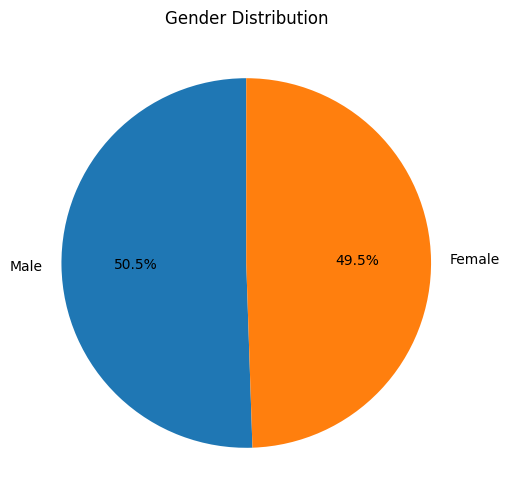

In [ ]:
# plotting a pie chart to show proportion of our gender
gender_counts = sleep_df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

observation and insights
-our data is made up of male and female gender are almost equaly distributed.

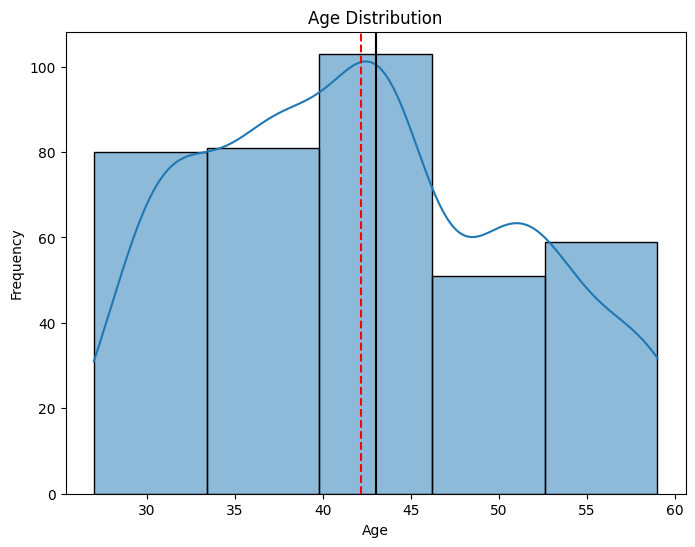

In [ ]:
# plotting Histogram graph to show our Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(sleep_df['Age'], bins=5, kde=True)

plt.axvline(sleep_df['Age'].mean(), color='red', linestyle='dashed', label='Mean')
plt.axvline(sleep_df['Age'].median(), color='green', linestyle='dotted', label='Median')
plt.axvline(sleep_df['Age'].mode()[0], color='black', linestyle='-', label='Mode')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Observation and insights

-most of the respondets were in the age of 30 to 45 mean being at 39 - 41.

-there is right skew distribution showing there are more younder than old participants


Text(0.5, 0, 'Sleep Disorder')

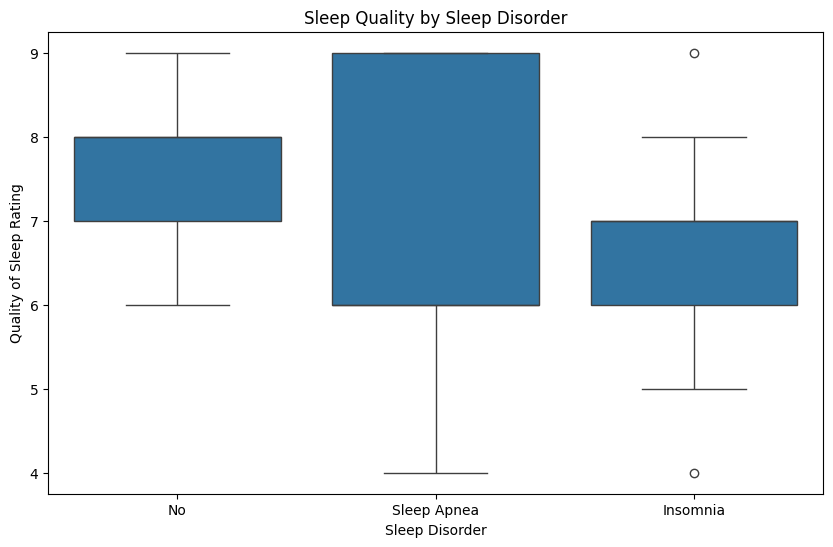

In [ ]:
#plotting a box plot from the Sleep quality and Sleep disorder columns to show their relationship
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep Rating', data=sleep_df)
plt.title('Sleep Quality by Sleep Disorder')
plt.xlabel('Sleep Disorder')

observation and insights

-in the 1st box plot shows that those that peope without sleep disorders had the best sleep quality. (healthy individuals have more  uniform and better sleep quality)

-middle boxplot showed mixed sleeping patterns some reporting high and some low. (sleep apnea causesinconsistent sleep quality, possibly depending on the severity or treatnent.)


-in the last box plot those who had low sleep quality reported of isomnia.. even thorethere is presence of outliers who reported higher sleep quality, even though this is rare (isomnia results in low sleep quality making it the most detrimental among the 3 gategories)

Bivariate analysis

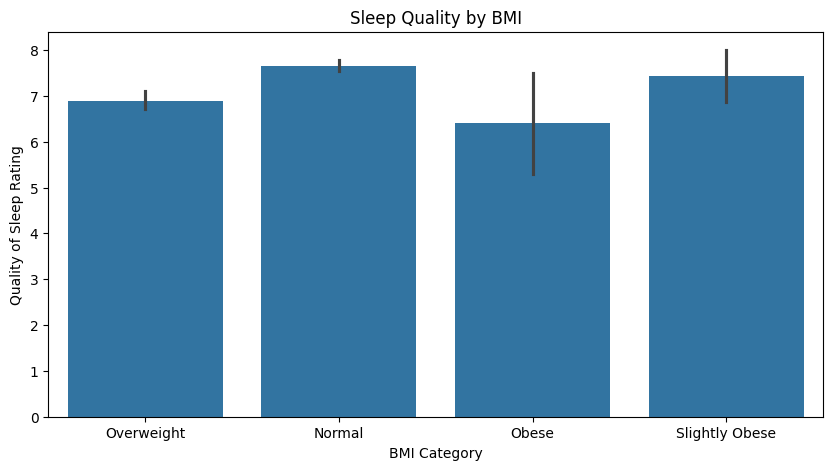

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='BMI Category', y='Quality of Sleep Rating', data=sleep_df)

# Add text labels on top of bars
values = sleep_df.groupby('BMI Category')['Quality of Sleep Rating'].mean().round(2).tolist()


# Add axis titles and main title
plt.title('Sleep Quality by BMI')
plt.xlabel('BMI Category')
plt.ylabel('Quality of Sleep Rating')
plt.show()


observation & insights


observation and insights
normal bmi was atributed with a high score of sleep quality while obese was attributed withthe lowest sleep quality whih clearly outlines their relationships

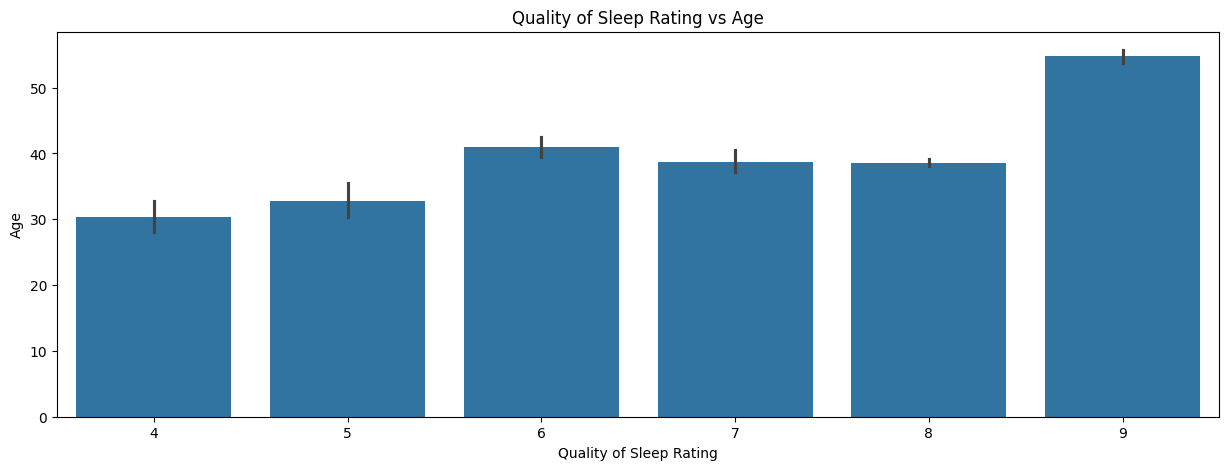

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(15, 5))
sns.barplot(x='Quality of Sleep Rating', y='Age', data=sleep_df)


# Add axis titles and main title
plt.title('Quality of Sleep Rating vs Age')
plt.xlabel('Quality of Sleep Rating')
plt.ylabel('Age')
plt.show()

observations and insights

the above bar chart shows that young individuals had lover sleep rating than older ones, probably because data was collected among the working population and thse young individuals are eneergetic and dont tire easily as compaired to older individuals

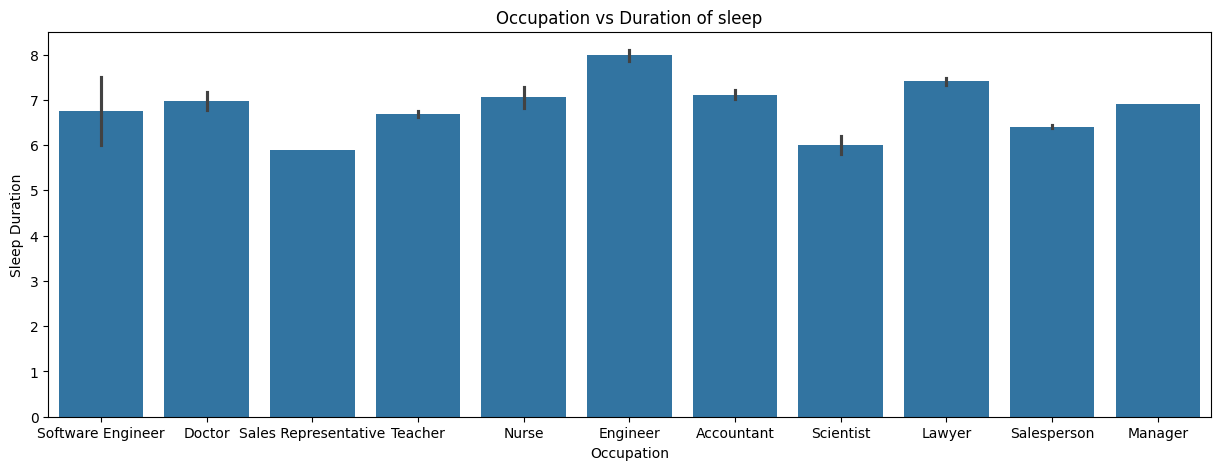

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(15, 5))
sns.barplot(x='Occupation', y='Sleep Duration (hrs)', data=sleep_df)


# Add axis titles and main title
plt.title('Occupation vs Duration of sleep')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
plt.show()


observation and insights

scientist and sales representatives recorded the lowest sleep duration probably due to their nature of work that revolves around achieving targets in a tight time frames..

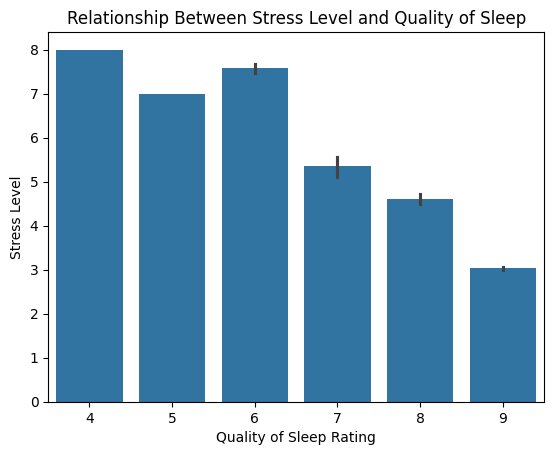

In [ ]:
#plotting a bar graph from Stress level and quality of sleep column to show their relationship
sns.barplot(x='Quality of Sleep Rating', y='Stress Level', data=sleep_df)
plt.title('Relationship Between Stress Level and Quality of Sleep')
plt.show()

observation and insights

there is inverse relationship between sleep quality and stress level
as quality of sleep decreases stress level increases and vice versa
those with the highest sleep quality reported the lowest stress hence better sleep quality is associated with less stress.

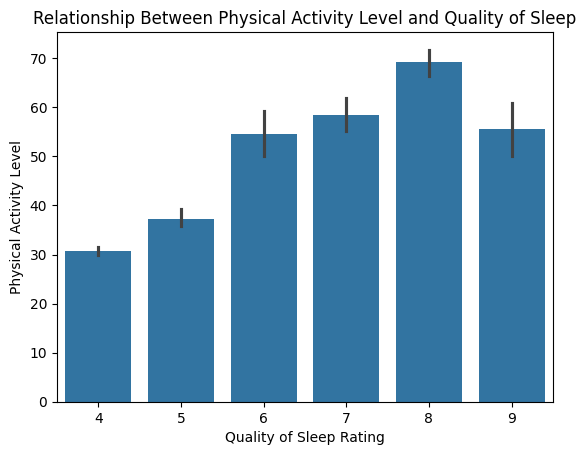

In [ ]:
#Bar graph showing quality of sleep rating and physical activity level
sns.barplot(x='Quality of Sleep Rating', y='Physical Activity Level', data=sleep_df)
plt.title('Relationship Between Physical Activity Level and Quality of Sleep')
plt.show()

observation and insights

- from the above graph we can see that as physical activity increases quality of sleep alseo increased. there is a slight drop at the end (9) which could be probably due to genetics/age factors.

- this shows that Individuals with better sleep quality (ratings 6–8) tend to engage in higher levels of physical activity, suggesting a bidirectional health benefit — good sleep may improve energy and motivation, while physical activity may enhance sleep which is seen in most sleep hygine research

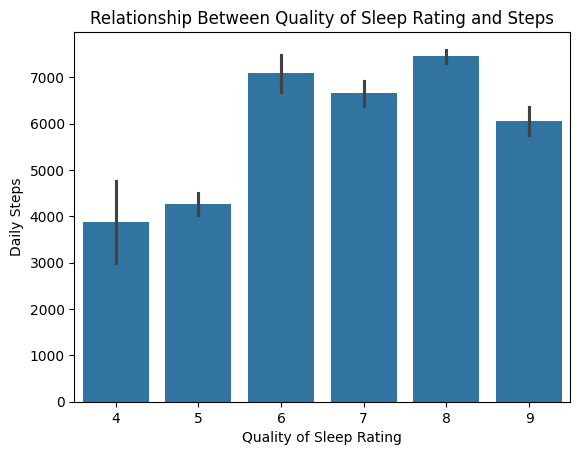

In [ ]:
# plotting a graph to show  relationship between number of steps and quality of sleep rating
sns.barplot(x='Quality of Sleep Rating', y='Daily Steps', data=sleep_df)
plt.title('Relationship Between Quality of Sleep Rating and Steps')
plt.show()

observation and insights

- from the above graph we can see that as Daily steps increases quality of sleep also increased and vice versa. there is a slight drop at the end (9) which could be probably due to genetics/age factors.

- this shows that there is a direct relationship between walking more and sleep Individuals with better sleep quality tend to walk more, suggesting a bidirectional health benefit.

multivariate analysis

Text(0.5, 1.0, 'Relationship Between Quality of Sleep Rating, Sleep Duration and Sleep Disorder')

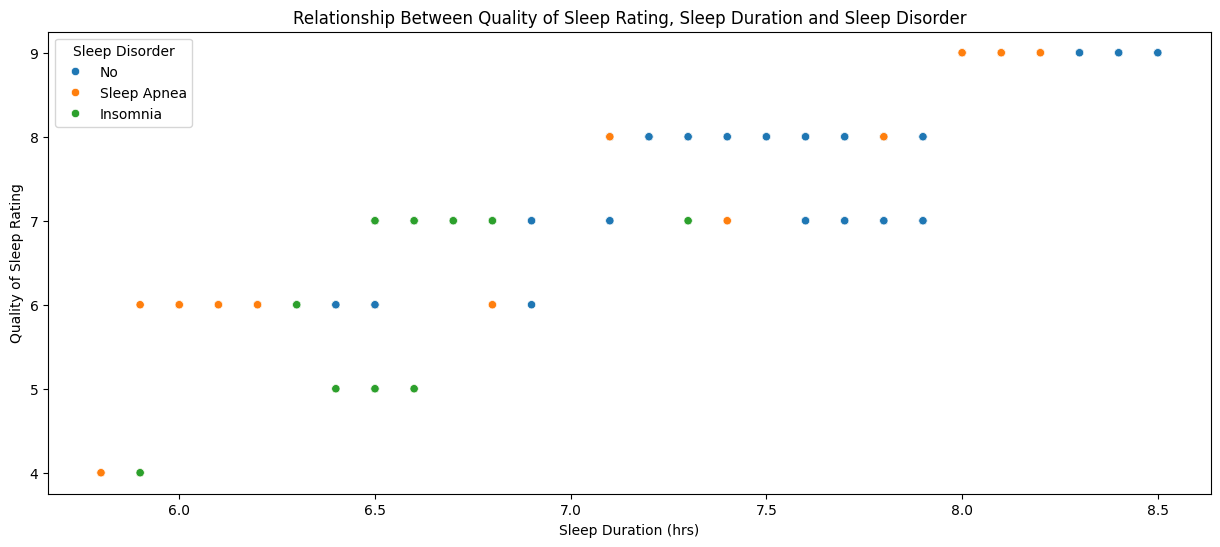

In [ ]:
#plotting a scatter plot fom the Sleep Duration, Sleep Disorder And Quality of sleep rating to show how they relate with each other
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Sleep Duration (hrs)', y='Quality of Sleep Rating', hue='Sleep Disorder', data=sleep_df)
plt.title('Relationship Between Quality of Sleep Rating, Sleep Duration and Sleep Disorder')

observation and insights

-there is a positive relationship between sleep quality and sleep duration and sleep disorders, as sleep duration increases, sleep quality also increases which is associated with no sleep disorder

Text(0.5, 1.0, 'Relationship Between Physical Activity, Sleep disorder and Systolic BP')

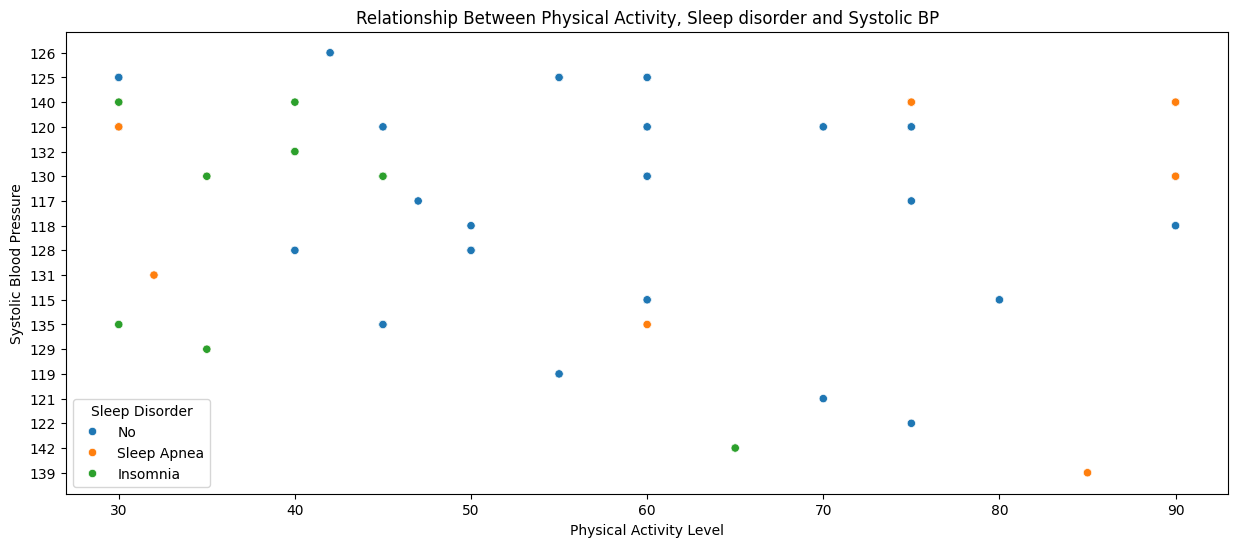

In [ ]:
#plotting a scatter plot fom the Physical Activity level Sleep Disorder And Systolic Blood pressure to show how they relate with each other
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Physical Activity Level', y='Systolic Blood Pressure', hue='Sleep Disorder', data=sleep_df)
plt.title('Relationship Between Physical Activity, Sleep disorder and Systolic BP')


observations

-sleep disoders physical activity and systolic blood pressure are related to each other

-those with sleeping disorders and (sleep apnea and isomnia)are more associated with sedentary life style(less physical activity) hence high systolic bpthose with less physical activity are associated with high systolic bp

-On the left side (low activity), systolic pressure tends to be higher (more dense between 130–140 mmHg), On the right side (high activity), values spread more into the normal/healthy range (under 130 mmHg).

Text(0.5, 1.0, 'Relationship Between Physical Activity, Sleep disorder and Diastolic BP')

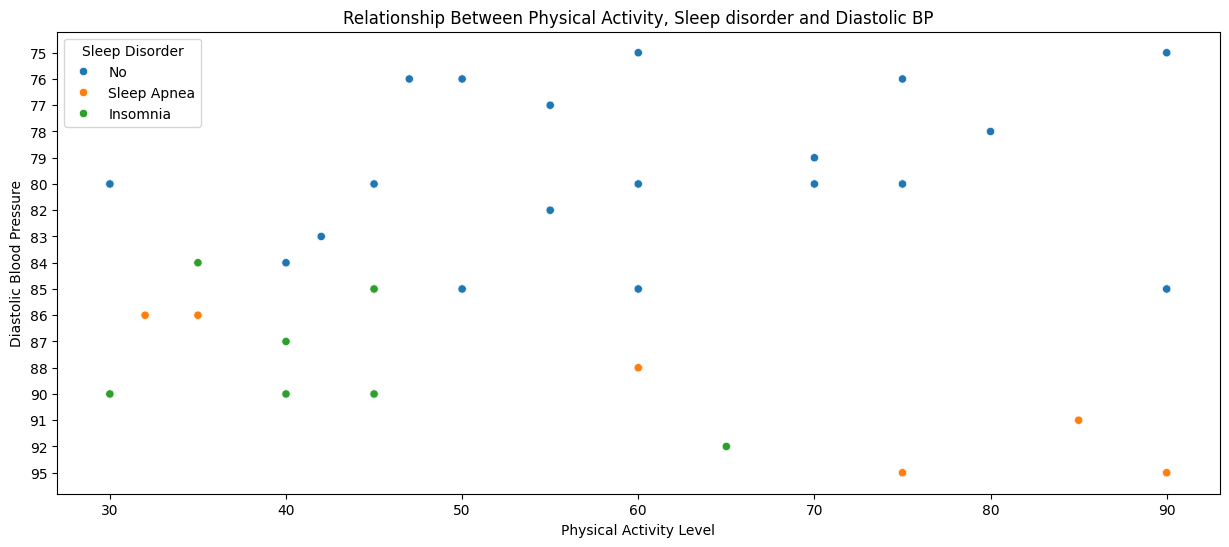

In [ ]:
#plotting a scatter plot fom the BMI, Quality of sleep rating And SDiastolic Blood Pressure to show how they relate with each other
sleep_df = sleep_df.sort_values(by = ['Diastolic Blood Pressure'])
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Physical Activity Level', y='Diastolic Blood Pressure', hue='Sleep Disorder', data=sleep_df)
plt.title('Relationship Between Physical Activity, Sleep disorder and Diastolic BP')


observations
Sleep disorders may be linked to higher diastolic BP

A number of Sleep Apnea (orange) and Insomnia (green) data points are located at higher BP levels (above 85 mmHg).

Individuals without sleep disorders (blue) appear more evenly distributed across the BP range.


Text(0.5, 1.0, 'Relationship Between Quality of Sleep Rating, Heart Rate and Stress Level')

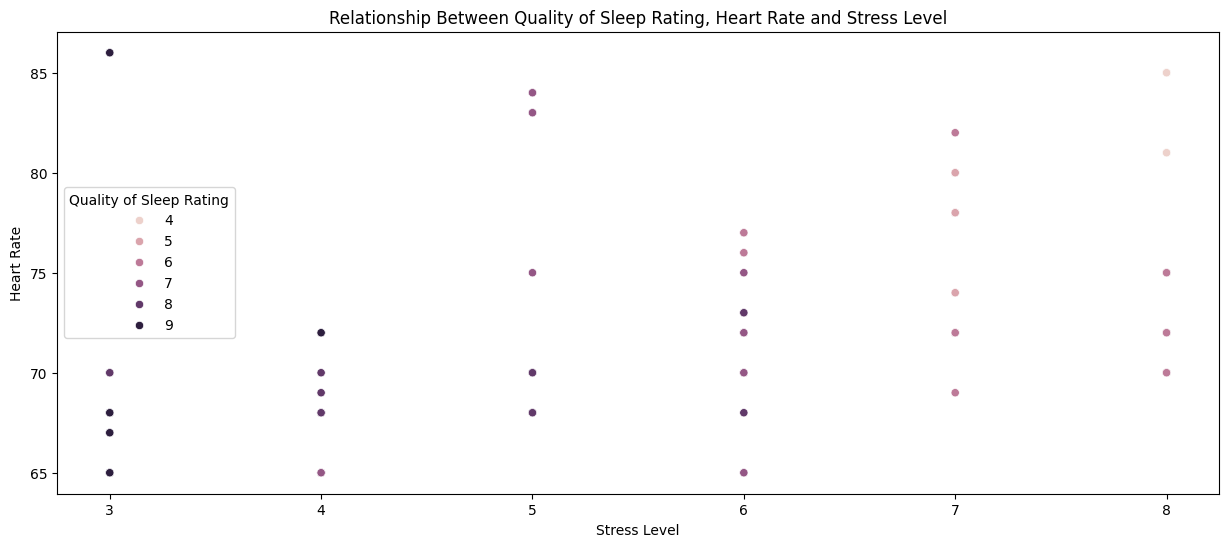

In [ ]:
#plotting a scatter plot from the Quality of Sleep Rating, Heart Rate and Stress Level coluns to show how they relate with each other
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Stress Level', y='Heart Rate', hue='Quality of Sleep Rating', data=sleep_df)
plt.title('Relationship Between Quality of Sleep Rating, Heart Rate and Stress Level')
#

Higher stress levels tend to associate with higher heart rates and vice versa

-On the right side of the plot (stress levels 7–8), many points cluster around higher heart rates (75–85 bpm).

-This suggests a positive relationship between stress and heart rate — a known physiological response.

Better sleep quality may correlate with lower heart rates

-Points with higher sleep quality ratings (e.g., 8–9) appear to be more frequent in the lower heart rate zones (~65–75 bpm).

-Meanwhile, lower quality sleep (ratings 4–5) tend to appear across higher heart rate values.


Text(0.5, 1.0, 'Relationship Between Quality of Sleep Rating, Physical Activity Level and Daily Steps')

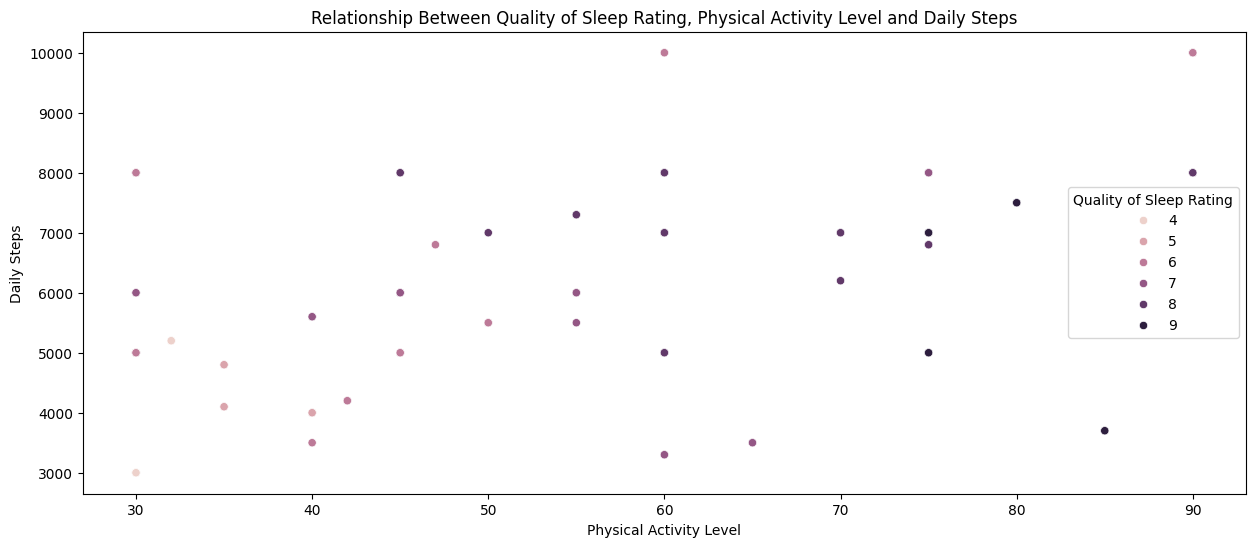

In [ ]:
#plotting a scatter plot from the Quality of Sleep Rating, Heart Rate and Stress Level coluns to show how they relate with each other
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Physical Activity Level', y='Daily Steps', hue='Quality of Sleep Rating', data=sleep_df)
plt.title('Relationship Between Quality of Sleep Rating, Physical Activity Level and Daily Steps')

observations and insights

- there is a direct relationship between physical activity, daily steps and quality of sleep
- as the dots get darker they were attributed to better sleep quality due to increased physical activity and steps

- this supports most sleep health resarches that physical exercise and walk atleast 30 mins may improve sleep quality in most individuals

## 6. Statistical Analysis
**Hypothesis Testing:**

based on the observation and interpretations that i have derived from the above visuals i would like to retain my original hypothesia that:

-There is a statistically significant relationship between sleep quality and stress level.

-There is a statistically significant relationship between sleep quality and blood pressure.

-There is a statistically significant relationship between sleep quality and stress level and heart rate.

-There is a statistically significant relationship between sleep quality and physical activity and saily steps.

-There is a statistically significant relationship between sleep quality and BMI.

**Deriving and plotting a Heatmap to show a correlation matrix for my data**

In [ ]:
# Select only the numeric columns before calculating the correlation matrix
numeric_sleep_df = sleep_df.select_dtypes(include=['number'])

# Calculate the correlation matrix on the numeric columns
correlation_matrix = numeric_sleep_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                              Age  Sleep Duration (hrs)  \
Age                      1.000000              0.344709   
Sleep Duration (hrs)     0.344709              1.000000   
Quality of Sleep Rating  0.473734              0.883213   
Physical Activity Level  0.178993              0.212360   
Stress Level            -0.422344             -0.811023   
Heart Rate              -0.225606             -0.516455   
Daily Steps              0.057973             -0.039533   

                         Quality of Sleep Rating  Physical Activity Level  \
Age                                     0.473734                 0.178993   
Sleep Duration (hrs)                    0.883213                 0.212360   
Quality of Sleep Rating                 1.000000                 0.192896   
Physical Activity Level                 0.192896                 1.000000   
Stress Level                           -0.898752                -0.034134   
Heart Rate                             -0.659865                 

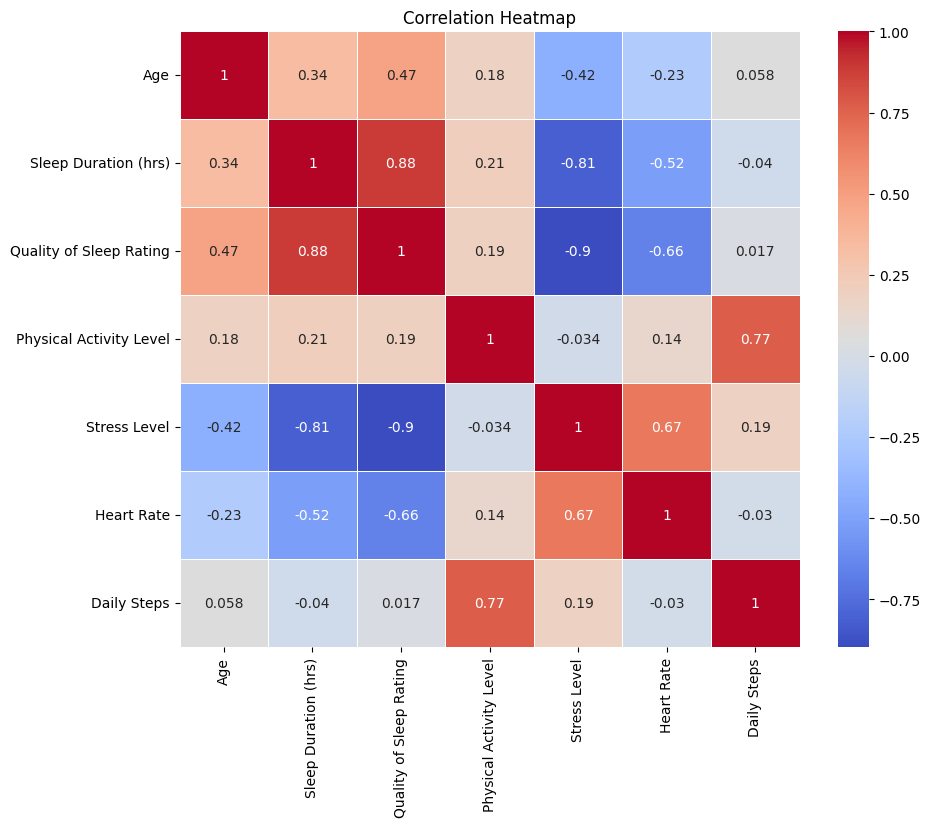

In [ ]:
#plotting a heatmap to show the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Findings from Correlation Heatmap

a. **Sleep Quality and Stress Level**

Correlation: -0.90
A very strong negative correlation exists between quality of sleep and stress level.

Interpretation: Individuals reporting higher stress levels tend to experience significantly lower sleep quality. This supports the hypothesis that stress negatively impacts sleep health.


b. **Sleep Duration and Stress Level**

Correlation: -0.81
Another strong negative correlation suggests that longer sleep duration is associated with reduced stress.

interpretation: Adequate sleep may act as a protective factor against elevated stress.


c. **Sleep Quality and Sleep Duration**

Correlation: +0.88
A very strong positive relationship between sleep duration and quality indicates that people who sleep longer also report better sleep quality.
interpretation: Sleep duration is a critical driver of perceived sleep health.


d. **Stress Level and Heart Rate**

Correlation: +0.67
This moderate to strong positive correlation
:interpretation: increased stress levels are physiologically expressed through elevated heart rates, a known stress response.

## 8. Key Insights
**Summary of Findings:**  

- adequate sleep  is associated with normal bmi which is good for general health
- adequate sleep is associated with low Blood pressure (systolic and diastolic) and heart rate which reduces someones risk for heart diseases.
- increased physical activity ie gym and walking alot can improve the quality of your sleep whichg inturn improves your general health.
- adequate sleep is associated with low rates of sleep disorders.



## 9. **Conclusion & Recommendations**



**Conclusion**

Sleep health is strongly influenced by stress, both in terms of quality and duration.

Heart rate can be used as a physiological marker of stress and poor sleep quality.

Physical activity ie gym and walikng alot contributes to better sleep quality.

Improving sleep habits may be a viable strategy for reducing stress and improving cardiovascular health.

**Recommendations**

Interventions targeting sleep improvement (e.g., public education about sleep hygiene, bedtime routines, physical activity ie gym and walikng alot) may help mitigate stress, improve general health and individual productivity.

Future studies should explore more factors that may contribute to poor sleep quality through longitudinal or experimental designs.

## 10. References & Appendix


- Data sources
  - kaggle website - https://www.kaggle.com/datasets/orvile/health-and-sleep-relation-2024
  - University of chicago website - https://news.uchicago.edu/explainer/how-sleep-affects-human-health-explained#:~:text=A%20lack%20of%20adequate%20sleep,a%20cold%20or%20the%20flu.
  - Chat GPT

- Python libraries used
  - pandas
  - numpy
  - stats
  - matplotlip
  - searbon



In [ ]:
# saving changes in my sleep_df to csv for dashbording in looker studio
sleep_df.to_csv('sleep_df.csv', index=False)

In [ ]:
from google.colab import files
files.download('sleep_df.csv')  # This will trigger a browser download


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>